In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pd.read_csv('../data/gdp_percapita.csv')

,Country or Area,Year,Value,Value Footnotes
0,Afghanistan,2023,1992.424394,NaN
1,Afghanistan,2022,1981.710168,NaN
2,Afghanistan,2021,2144.166570,NaN
3,Afghanistan,2020,2769.685745,NaN
4,Afghanistan,2019,2927.245144,NaN
...,...,...,...,...
8214,Zimbabwe,1994,3965.730986,NaN
8215,Zimbabwe,1993,3634.750494,NaN
8216,Zimbabwe,1992,3649.891947,NaN
8217,Zimbabwe,1991,4126.405247,NaN


### Q. 4 Using the pandas `read_csv()` method, read the GDP dataset into your notebook as a DataFrame called `gdp_df`. Take a look at the first few and last few rows to familiarize yourself with what is contained in this dataset.

In [3]:
gdp_df = pd.read_csv('../data/gdp_percapita.csv')
gdp_df.head()

,Country or Area,Year,Value,Value Footnotes
0,Afghanistan,2023,1992.424394,NaN
1,Afghanistan,2022,1981.710168,NaN
2,Afghanistan,2021,2144.166570,NaN
3,Afghanistan,2020,2769.685745,NaN
4,Afghanistan,2019,2927.245144,NaN


In [4]:
gdp_df.tail()

,Country or Area,Year,Value,Value Footnotes
8214,Zimbabwe,1994,3965.730986,NaN
8215,Zimbabwe,1993,3634.750494,NaN
8216,Zimbabwe,1992,3649.891947,NaN
8217,Zimbabwe,1991,4126.405247,NaN
8218,Zimbabwe,1990,4013.299059,NaN


### Q. 5 How many rows and columns are in `gdp_df`? What are the data types of each column?

In [5]:
gdp_df.shape

(8219, 4)

In [6]:
gdp_df.info

<bound method DataFrame.info of      Country or Area  Year        Value  Value Footnotes
0        Afghanistan  2023  1992.424394              NaN
1        Afghanistan  2022  1981.710168              NaN
2        Afghanistan  2021  2144.166570              NaN
3        Afghanistan  2020  2769.685745              NaN
4        Afghanistan  2019  2927.245144              NaN
...              ...   ...          ...              ...
8214        Zimbabwe  1994  3965.730986              NaN
8215        Zimbabwe  1993  3634.750494              NaN
8216        Zimbabwe  1992  3649.891947              NaN
8217        Zimbabwe  1991  4126.405247              NaN
8218        Zimbabwe  1990  4013.299059              NaN

[8219 rows x 4 columns]>

### Q. 6 Drop the `Value Footnotes` column and rename the remaining three to 'Country', 'Year', and 'GDP_Per_Capita'.

In [9]:
gdp_df = gdp_df.drop(columns = ['Value Footnotes'])

In [13]:
gdp_df = gdp_df.rename(columns = {'Country or Area': 'Country', 'Year':'Year', 'Value': 'GDP_Per_Capita'})

In [15]:
gdp_df.head()

,Country,Year,GDP_Per_Capita
0,Afghanistan,2023,1992.424394
1,Afghanistan,2022,1981.710168
2,Afghanistan,2021,2144.166570
3,Afghanistan,2020,2769.685745
4,Afghanistan,2019,2927.245144


### Q. 7 How many countries have data for all years? Which countries are missing many years of data? Look at the number of observations per year. What do you notice?

In [27]:
gdp_df['Year'].nunique()

34

In [37]:
gdp_country_count = gdp_df['Country'].value_counts().to_frame().reset_index()

In [40]:
len(gdp_country_count.loc[gdp_country_count['count'] == gdp_df['Year'].nunique()])

228

### Q.8 In this question, you're going to create some plots to show the distribution of GDP per capita for the year 2020. Go to the Python Graph Gallery (https://www.python-graph-gallery.com/) and look at the different types of plots under the Distribution section. Create a histogram, a density plot, a boxplot, and a violin plot. What do you notice when you look at these plots? How do the plots compare and what information can you get out of one type that you can't necessarily get out of the others?

In [44]:
gdp_2020 = gdp_df.loc[(gdp_df.Year == 2020)]

In [45]:
gdp_2020

,Country,Year,GDP_Per_Capita
3,Afghanistan,2020,2769.685745
27,Africa Eastern and Southern,2020,3861.111238
61,Africa Western and Central,2020,4622.731427
95,Albania,2020,14650.395929
129,Algeria,2020,14194.155748
...,...,...,...
8068,Virgin Islands,2020,45055.782930
8090,West Bank and Gaza,2020,5423.682547
8120,World,2020,18600.986362
8154,Zambia,2020,3391.595412


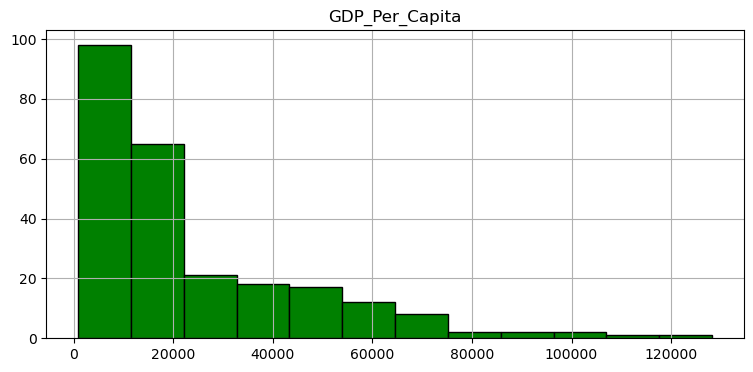

In [50]:
gdp_2020['GDP_Per_Capita'].hist(bins = 12, color = 'green', edgecolor = 'black', figsize = (9,4))

plt.title('GDP_Per_Capita', fontsize = 12);

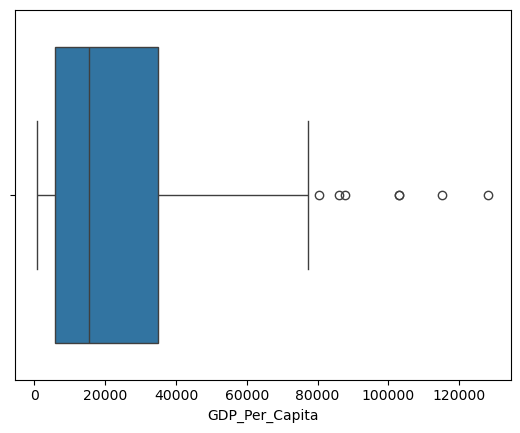

In [48]:
sns.boxplot(data = gdp_2020, x = 'GDP_Per_Capita');

<Axes: xlabel='GDP_Per_Capita', ylabel='Density'>

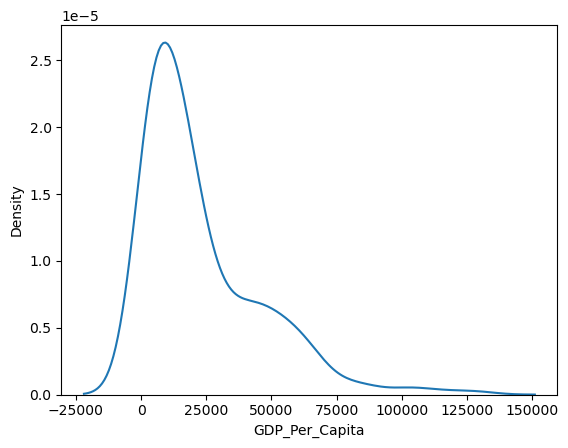

In [52]:
sns.kdeplot(gdp_2020['GDP_Per_Capita'])

<Axes: xlabel='Country', ylabel='GDP_Per_Capita'>

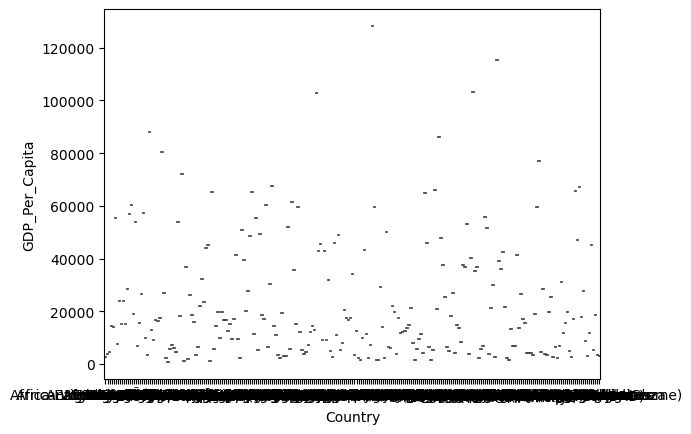

In [53]:
sns.violinplot(x=gdp_2020["Country"], y=gdp_2020["GDP_Per_Capita"])

### Q.9 What was the median GDP per capita value in 2020?

In [56]:
gdp_2020['GDP_Per_Capita'].describe()

count       247.000000
mean      23044.942556
std       22856.889868
min         833.920257
25%        5857.324918
50%       15309.235988
75%       34823.614188
max      128256.560341
Name: GDP_Per_Capita, dtype: float64

In [57]:
gdp_2020['GDP_Per_Capita'].median()

15309.23598817024

### Q. 10 For this question, you're going to create some visualizations to compare GDP per capita values for the years 1990, 2000, 2010, and 2020. Start by subsetting your data to just these 4 years into a new DataFrame named gdp_decades. Using this, create the following 4 plots:
	* A boxplot
	* A barplot (check out the Barplot with Seaborn section: https://www.python-graph-gallery.com/barplot/#Seaborn)
	* A scatterplot
	* A scatterplot with a trend line overlaid (see this regplot example: https://www.python-graph-gallery.com/42-custom-linear-regression-fit-seaborn)  

In [59]:
gdp_decades = gdp_df.loc[(gdp_df.Year == 1990) | (gdp_df.Year == 2000) | (gdp_df.Year == 2010) | (gdp_df.Year == 2020)]
gdp_decades

,Country,Year,GDP_Per_Capita
3,Afghanistan,2020,2769.685745
13,Afghanistan,2010,2848.586061
23,Afghanistan,2000,1617.826475
27,Africa Eastern and Southern,2020,3861.111238
37,Africa Eastern and Southern,2010,3863.836012
...,...,...,...
8184,Zambia,1990,2425.111287
8188,Zimbabwe,2020,2987.269823
8198,Zimbabwe,2010,2572.769992
8208,Zimbabwe,2000,4071.022001


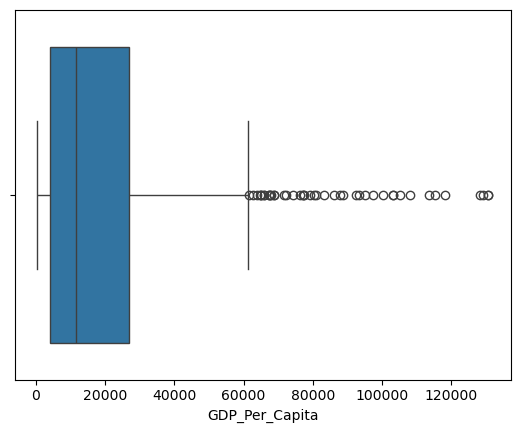

In [60]:
sns.boxplot(data = gdp_decades, x = 'GDP_Per_Capita');

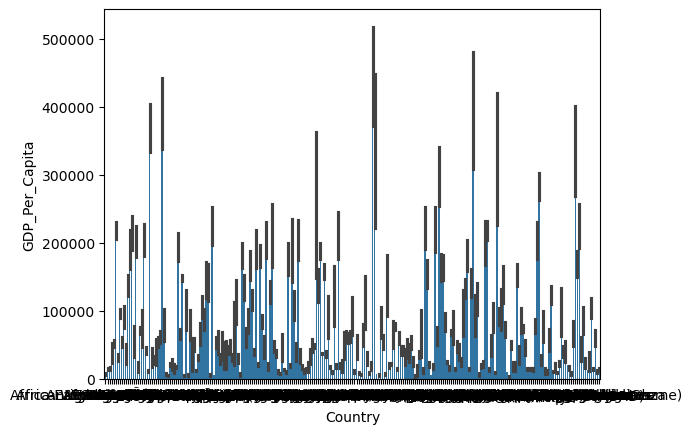

In [62]:
sns.barplot(
    x="Country", 
    y="GDP_Per_Capita", 
    data=gdp_decades, 
    estimator=sum);